In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections

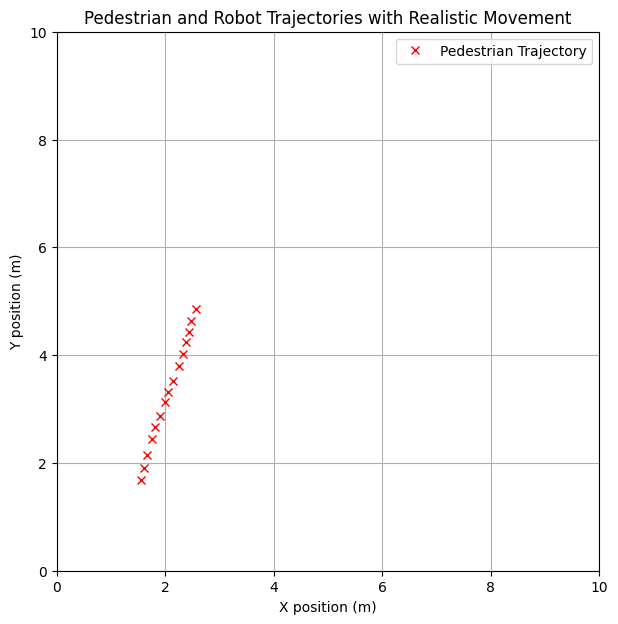

In [136]:
def create_traj(dataset_size):
    # Parameters
    dt = 0.4  # time step
    env_size = 8.0
    range_limit = 3.0  # range within which the pedestrian slows down or stops
    stop_distance = 1.0  # distance at which pedestrian will stop moving
    
    traj_dict = tensor_dict = collections.defaultdict(dict)

    for i in range(dataset_size):
        total_time = 6  # total time for the simulation
        base_speed = np.random.choice([0.2, 0.4, 0.6])  # base speed of pedestrian in m/s
        robot_speed = 0.5  # average speed of robot in m/s
        noise_strength = np.random.choice([0.05,0.1, 0.15])  # strength of the random noise for pedestrian movement
        speed_variation_strength = np.random.choice([0.02,0.05,0.1]) # magnitude of speed variation
        
        # Initialize positions (x, y) for pedestrian and robot
        pedestrian_pos = np.random.uniform(0, env_size, 2)
        robot_pos = np.random.uniform(0, env_size, 2)

        # Set initial goals
        pedestrian_goal = np.random.uniform(0, env_size*2, 2)
        robot_goal = np.random.uniform(0, env_size*2, 2)

        # Store trajectories
        pedestrian_trajectory = []
        robot_trajectory = []
        #relative_trajectory = []

        # Function to move pedestrian towards goal with noise and speed variations
        def move_pedestrian(ped_pos, goal_pos, speed, dt):
            direction = goal_pos - ped_pos
            distance_to_goal = np.linalg.norm(direction)
            if distance_to_goal > 0:
                direction = direction / distance_to_goal  # Normalize to get unit vector
            
            # Add noise to the direction for more realistic movement
            noise = np.random.normal(0, noise_strength, 2)
            direction += noise
            direction = direction / np.linalg.norm(direction)  # Re-normalize after adding noise
            
            # Apply speed variations
            speed += np.random.normal(0, speed_variation_strength)
            speed = max(0, speed)  # Ensure speed doesn't become negative
            
            # Compute new position
            new_position = ped_pos + direction * speed * dt
            return new_position

        # Simulation loop
        for t in np.arange(0, total_time, dt):
            
            # Move pedestrian towards goal with noise and speed variations
            pedestrian_pos = move_pedestrian(pedestrian_pos, pedestrian_goal, base_speed, dt)
            
            # Calculate relative position
            #relative_pos = pedestrian_pos - robot_pos
            
            # Store the positions
            pedestrian_trajectory.append(pedestrian_pos.copy())
           # relative_trajectory.append(relative_pos.copy())
            

        # Convert to numpy arrays for easier handling
        pedestrian_trajectory = np.array(pedestrian_trajectory)
        robot_trajectory = np.array(robot_trajectory)
        traj_dict[i] = {'positions': pedestrian_trajectory,
                      'poses': np.zeros([pedestrian_trajectory.shape[0], 17,3])}
        #relative_trajectory = np.array(relative_trajectory)
    new_df = pd.DataFrame.from_dict(tensor_dict, orient='index')
    return new_df

def plot_traj(df, index):

    pedestrian_trajectory = df.iloc[index]['positions']

    # Plot trajectories
    plt.figure(figsize=(7, 7))
    plt.plot(pedestrian_trajectory[:, 0], pedestrian_trajectory[:, 1], 'rx', label='Pedestrian Trajectory')
    #plt.plot(robot_trajectory[:, 0], robot_trajectory[:, 1],'bx', label='Robot Trajectory')
    #plt.plot(pedestrian_goal[0], pedestrian_goal[1], 'ro', label='Pedestrian Goal')
    #plt.plot(robot_goal[0], robot_goal[1], 'bo', label='Robot Goal')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.legend()
    plt.xlabel("X position (m)")
    plt.ylabel("Y position (m)")
    plt.title("Pedestrian and Robot Trajectories with Realistic Movement")
    plt.grid()
    plt.show()

df = create_traj(1)